In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
plt.rcParams['figure.dpi'] = 200

# Data Loading

# Loading the california housing dataset CSV

```
We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables. T he final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).
```

In [2]:
housing = pd.read_csv("data/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.shape

(20640, 10)

In [5]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
continuous_dependent = housing.columns[:-2]

<IPython.core.display.Javascript object>


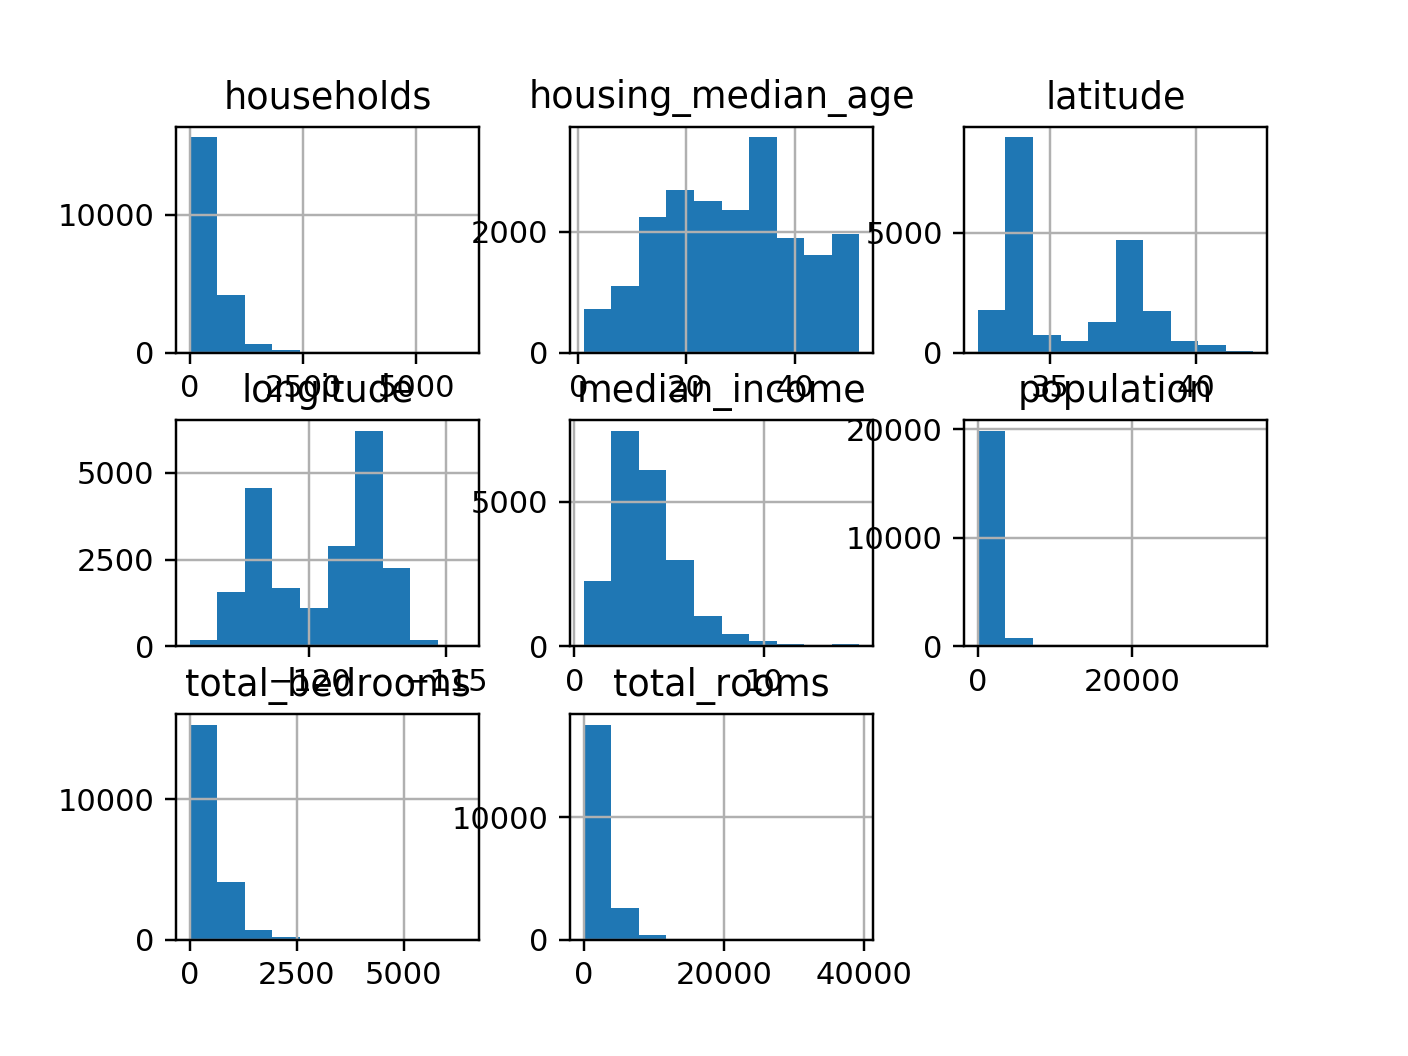

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5aa385278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb5a6cdda58>]], dtype=object)

In [7]:
housing[continuous_dependent].hist()

<IPython.core.display.Javascript object>


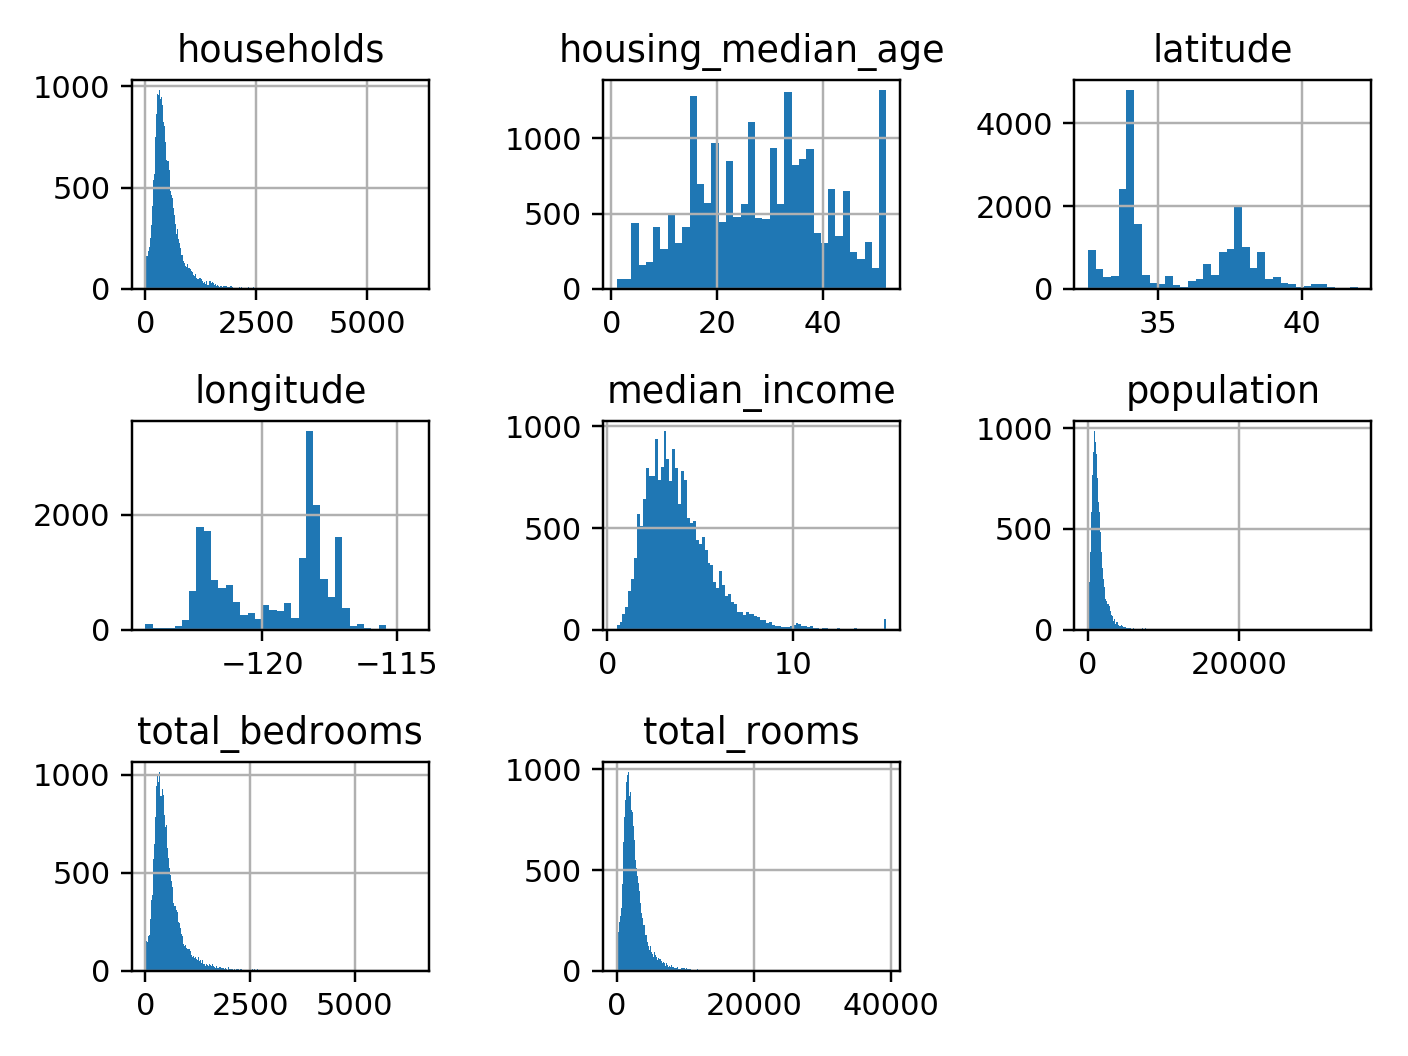

In [8]:
housing[continuous_dependent].hist(bins="auto")
plt.tight_layout()

In [9]:
housing.population.sort_values().tail()

6057     15507.0
10309    16122.0
13139    16305.0
9880     28566.0
15360    35682.0
Name: population, dtype: float64

<IPython.core.display.Javascript object>


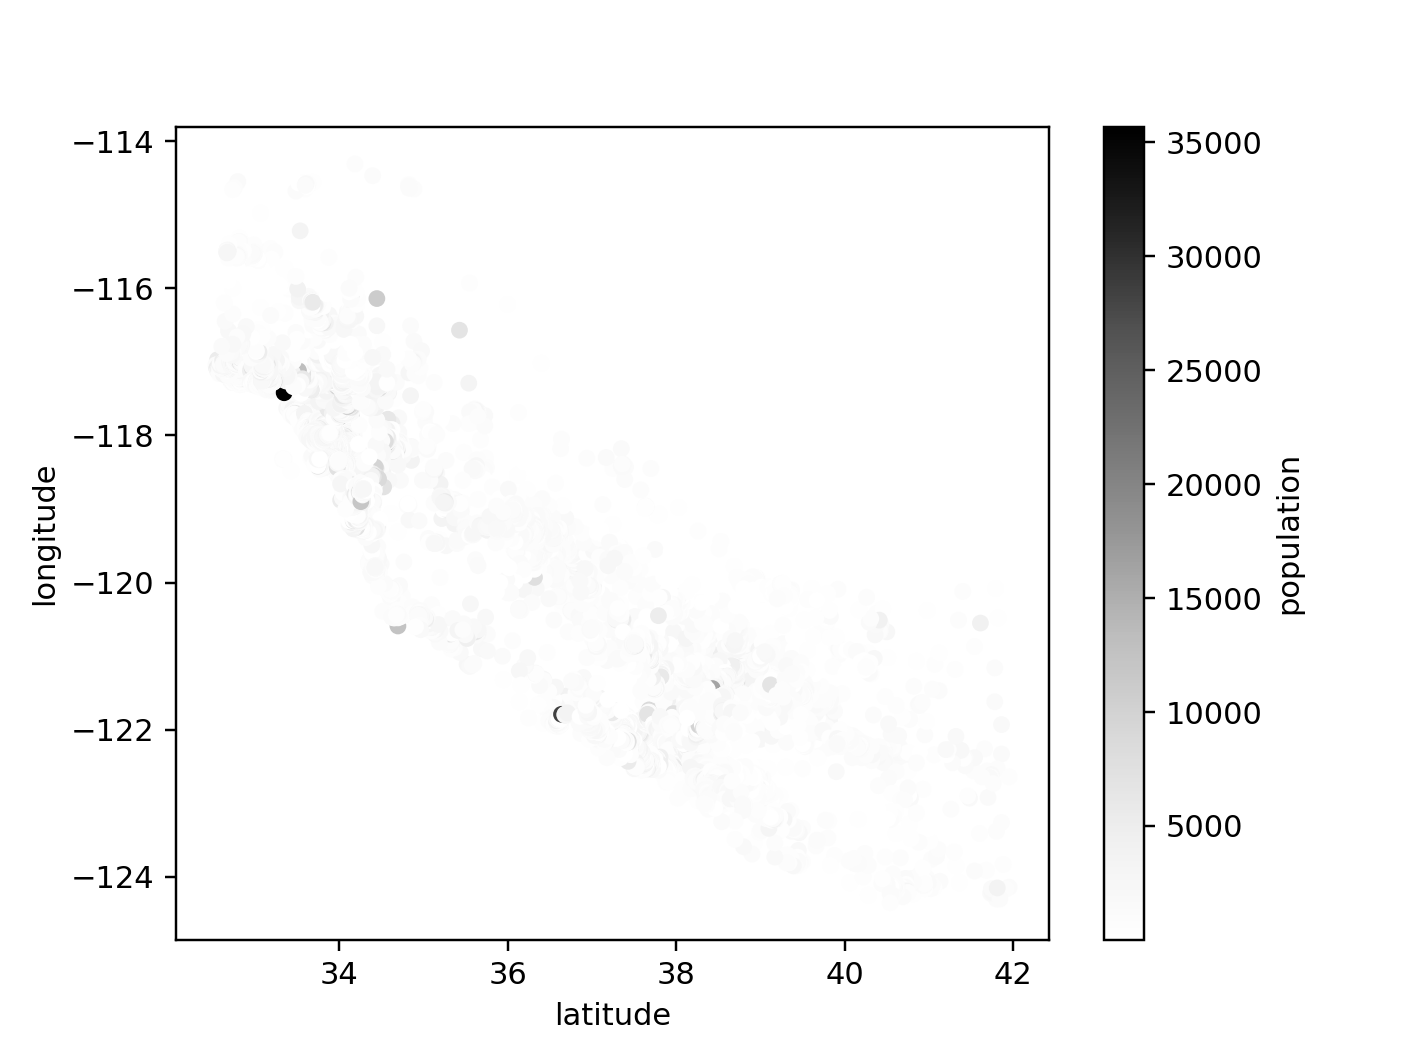

In [10]:
housing.plot(x='latitude', y='longitude', kind='scatter', c='population')

<IPython.core.display.Javascript object>


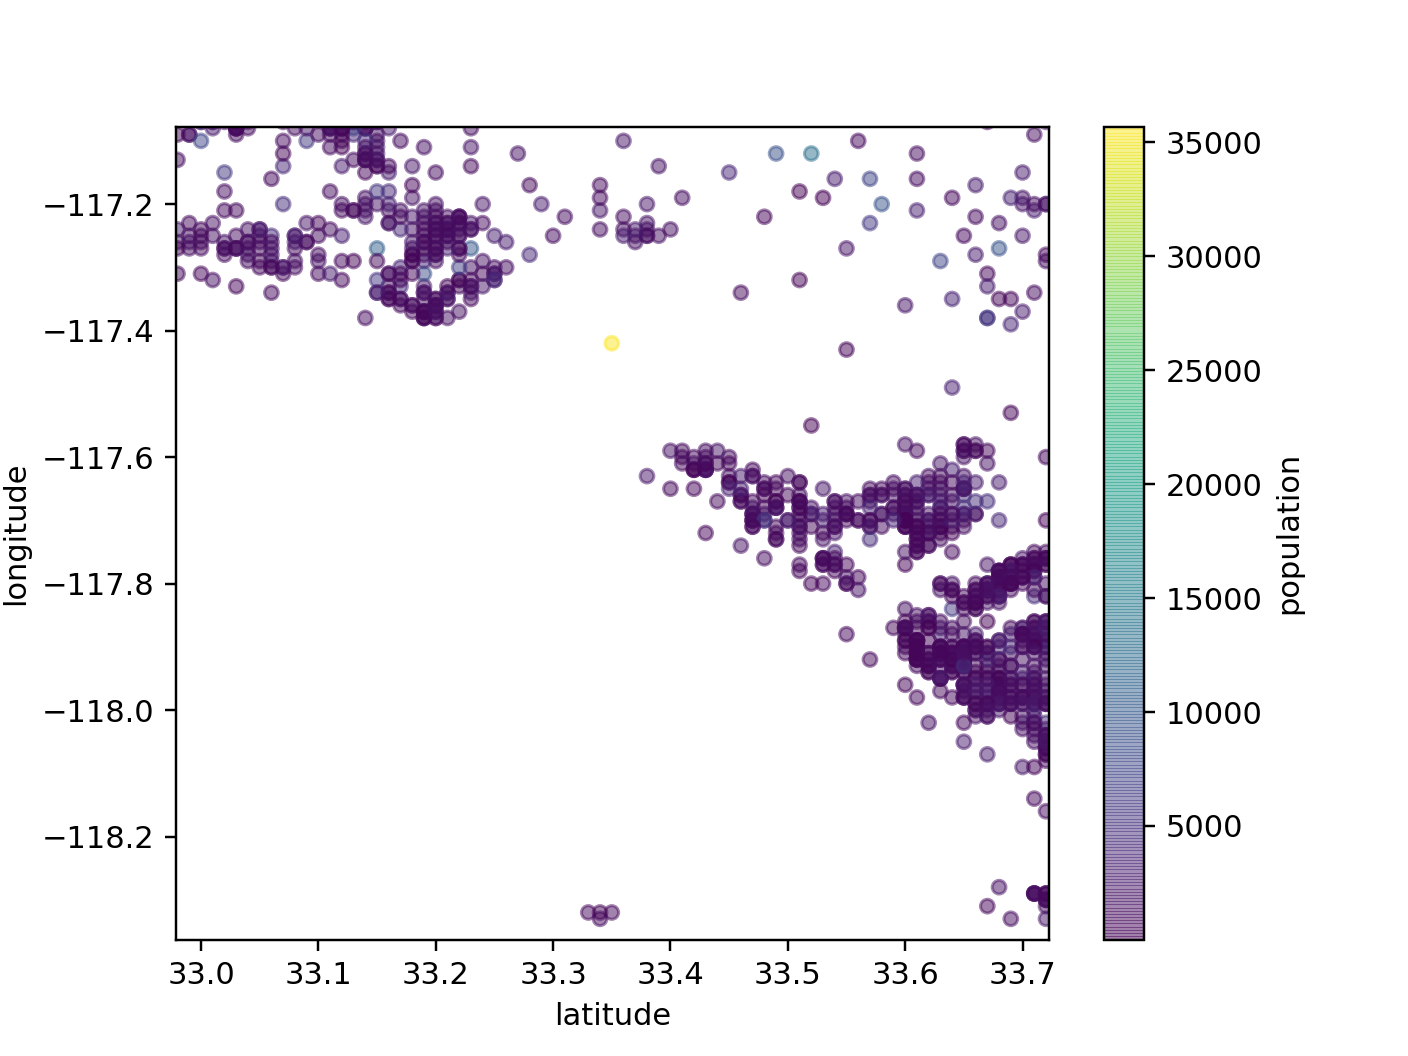

In [11]:
housing.plot(x='latitude', y='longitude', kind='scatter', c='population', alpha=.5, cmap='viridis')

# Exercise
Make a better plot! Confirm whether the outliers make sense.

In [12]:
# your solution here

In [13]:
# my solution:
# %load solutions/plot_california.py

<IPython.core.display.Javascript object>


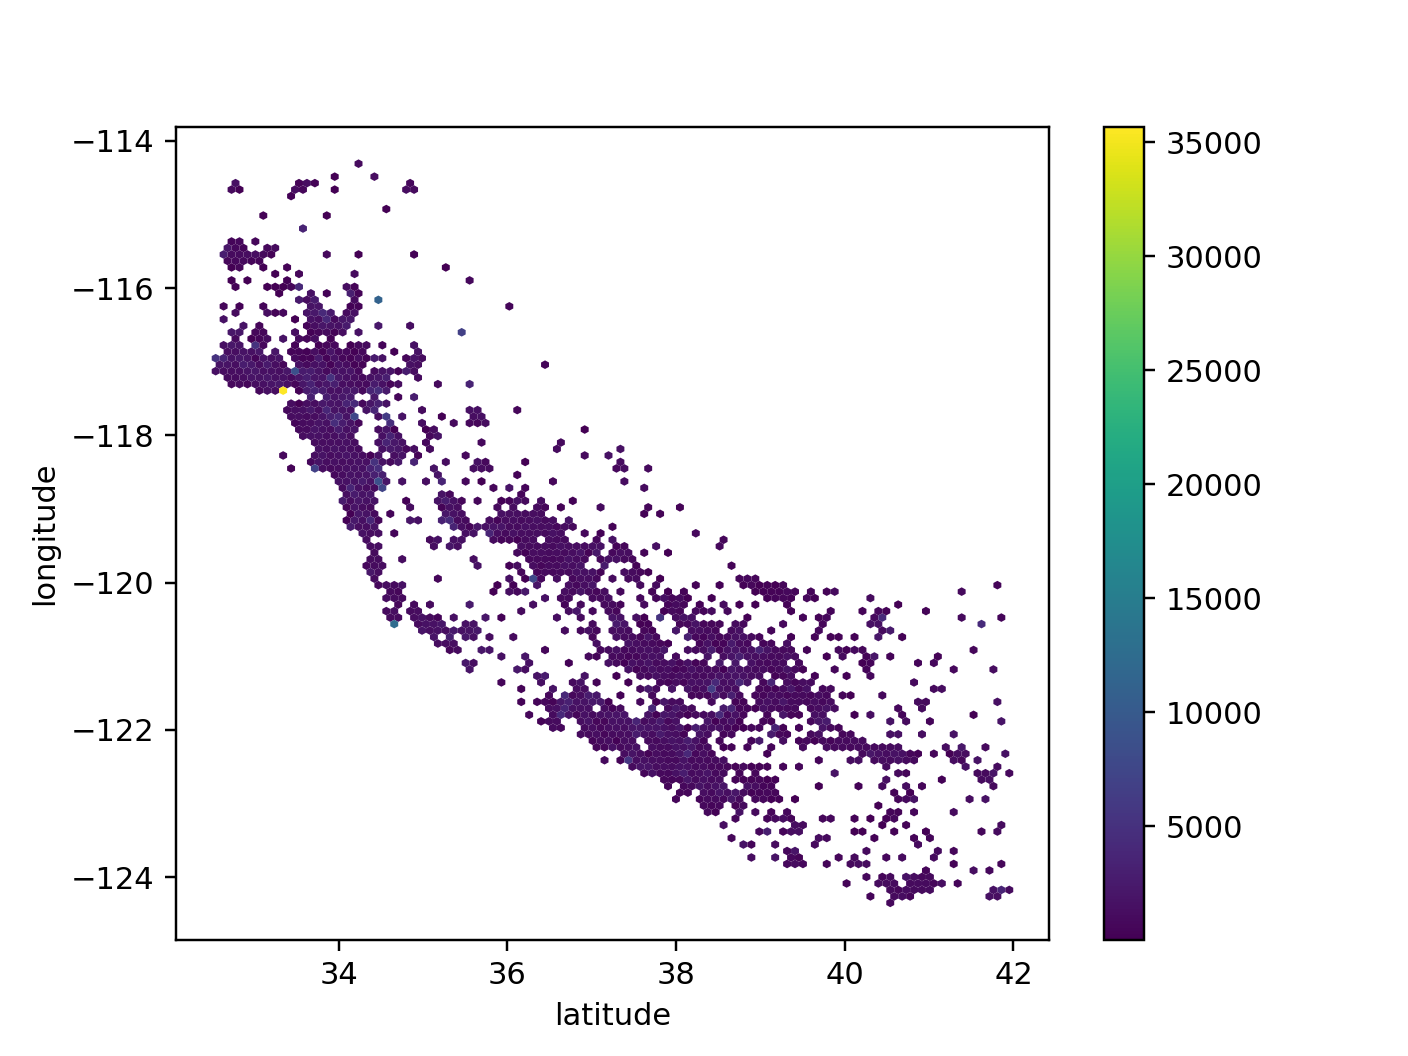

In [26]:
# could have also done kind='hexbin' but that doesn't show us a helpful docstring:
# housing.plot(x='latitude', y='longitude', kind='hexbin', C='population', cmap='viridis')
housing.plot.hexbin(x='latitude', y='longitude', C='population', cmap='viridis', linewidth=0)

<IPython.core.display.Javascript object>


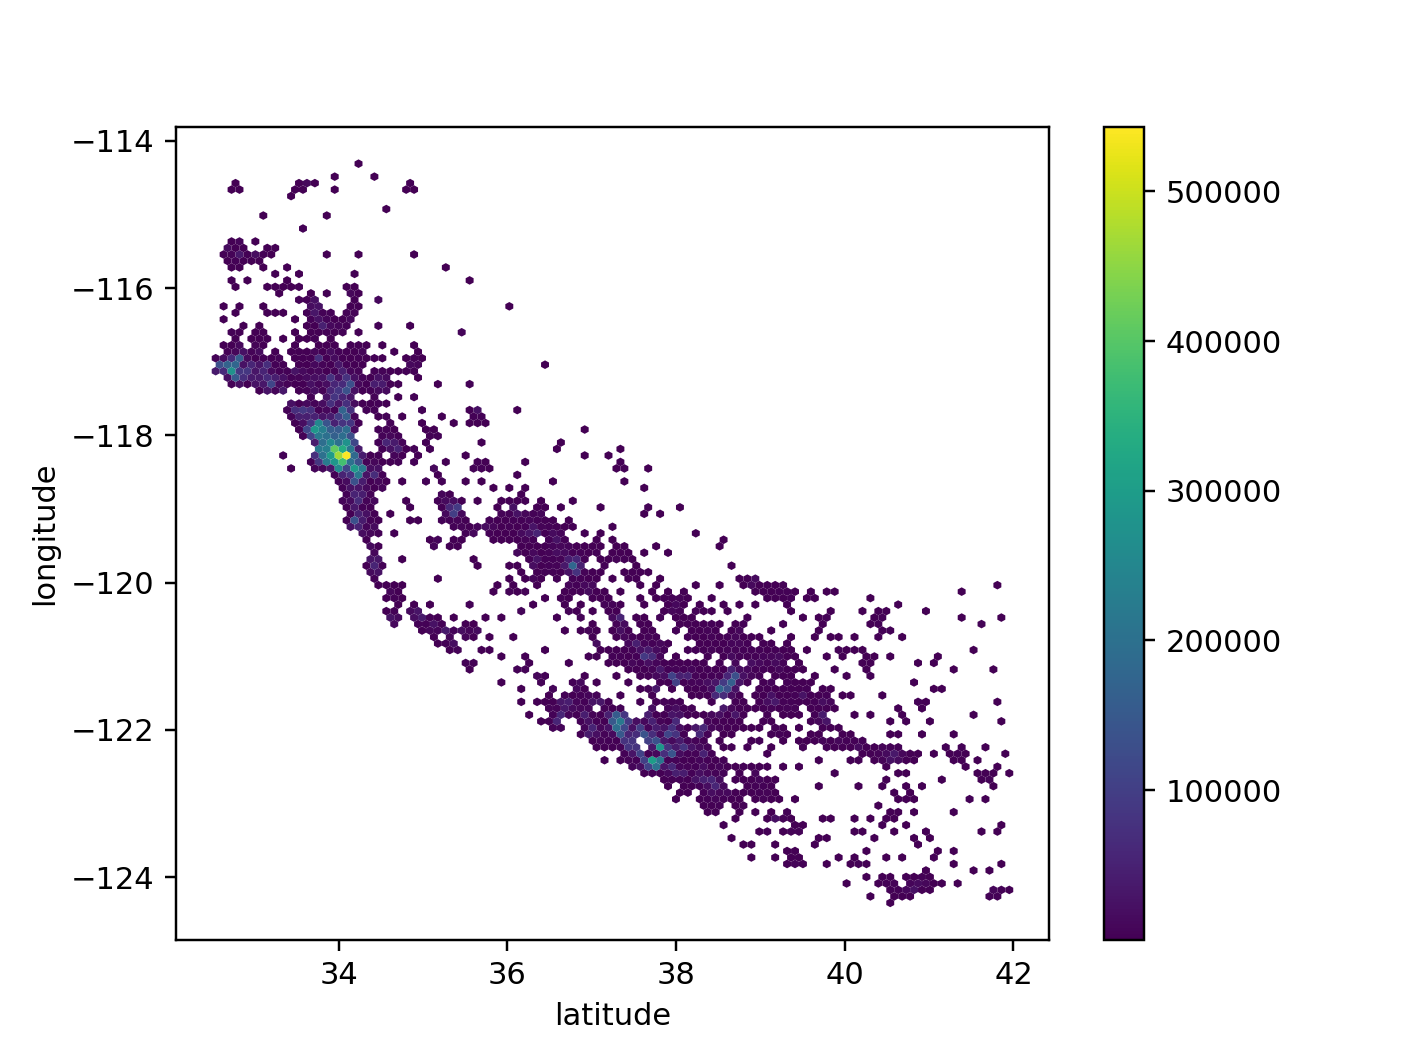

In [27]:
housing.plot.hexbin(x='latitude', y='longitude', C='population', cmap='viridis', reduce_C_function=sum, linewidth=0)

In [15]:
housing.total_bedrooms.sort_values().tail()

20267   NaN
20268   NaN
20372   NaN
20460   NaN
20484   NaN
Name: total_bedrooms, dtype: float64

In [16]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Exercise
Are the "total_bedrooms" missing at random?
(hing: Use sns.facetgrid)